# Implemention of Simulated Annealing
modified based on codes by Jason Brownlee

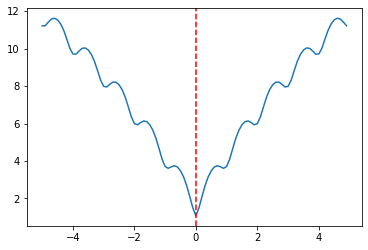

In [110]:
# objective function is 1D Ackley fucntion a multimodal function with multiple local mininums

from numpy import arange
import matplotlib.pyplot as plt
import math

#objective function
def objective (x):
    return -20*np.exp(-0.2*np.sqrt(0.5*x[0]**2))-np.exp(0.5*math.cos(2*math.pi*x[0]))+np.exp(1)+20

#define range for input
r_min, r_max = -5.0, 5.0
# sample input range uniformly at 0.1 increments
inputs=arange(r_min, r_max,0.1)
#compute targets
results=[objective([x]) for x in inputs]
#create a line plot of input vs result
plt.plot (inputs, results)
# define optimal input value
x_optima=0.0
#draw a vertical line at the optimal input
plt.axvline(x=x_optima, ls='--', color='red')
# show the plot
plt.show()

## Here is the annealing algorithm
randomly generating an intial step, calculate according value
take the next step using a normal distribution(randn), calculate according value
if smaller, take it
elif take it if randomly generated value smaller than Metropolis function
iterate and update the Metropolis temperature (here we used a simple one initial_temp/ float(i+1))


In [115]:
#simulated annealing algorithm
def simulated_annealing(objective, bounds,n_iteractions, step_size, temp):
    #generate an intinal pont as a randon point wihthin the bounds of the problem
    best=bounds[:,0]+ np.random.rand(len(bounds))*(bounds[:,1]-bounds[:,0])
    #evaluate teh initial point
    best_eval=objective(best)
    # current working solution
    curr, curr_eval =best, best_eval
    scores= list()
    #loop over interations of algorithem
    #run the algorithm
    for i in range(n_iterations):
        #take a step
        candidate=curr +np.random.randn(len(bounds))*step_size
        #evaluate candiate point
        candidate_eval=objective(candidate)
        if candidate_eval < best_eval:
            #store new best point
            best, best_eval = candidate, candidate_eval
            scores.append(best_eval)
            # report progress
            print('>%d f(%s)=%.5f'%(i, best, best_eval))
        #difference between candidate and current point evaluation
        diff=candidate_eval - curr_eval

        # calculate tempreature for current epoch
        t =temp/float(i+1)

        #calculate metroplolis acceptance criteria
        metropolis =np.exp(-diff/t)

        # keept the new point in this two senarioes
        if diff < 0 or np.random.rand() < metropolis:
            #store the new current point
            curr, curr_eval = candidate, candidate_eval 
    return[best, best_eval,scores]


## a glimpse of the metropolis temperature change as the iteraction step increases

Text(0, 0.5, 'Temperature')

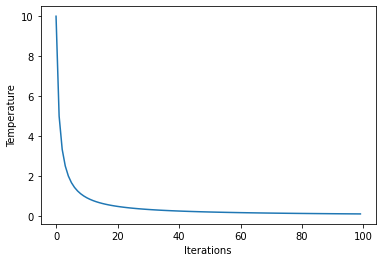

In [29]:
# explore temperature vs algorithm iteration for simulated annealing
iterations=100
#initial temperature
initial_temp=10
#array of iteraction from 0 to interactions-1
iterations=[i for i in range(iterations)]
#temperature for each iteration
temperatures = [initial_temp/ float(i+1)for i in iterations]
#plot iteractions vs temp
plt.plot(iterations,temperatures)
plt.xlabel('Iterations')
plt.ylabel('Temperature')

## a glimpse of the metropolis criteria change as the iteraction step increases at three different energy gaps

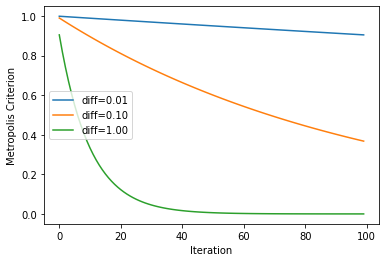

In [32]:
#explore metropolis accepance criterion for simulated annealing
from math import exp
differences=[0.01,0.1,1.0]
for d in differences:
    metropolis=[exp(-d/t) for t in temperatures]
    #plot iterations vs metropolis
    label='diff=%.2f'%d
    plt.plot(iterations, metropolis, label=label)
plt.xlabel('Iteration')
plt.ylabel('Metropolis Criterion')
plt.legend()

## run time

>9 f([-1.18440856])=4.58102
>10 f([-1.01124345])=3.73673
>12 f([-0.95547968])=3.62916
>15 f([-0.89969296])=3.61005
>27 f([-0.46673699])=3.38262
>33 f([-0.45888364])=3.35830
>35 f([-0.42302761])=3.23737
>46 f([-0.30155952])=2.70043
>47 f([-0.15565841])=1.83150
>49 f([-0.10626852])=1.53575
>50 f([-0.09072569])=1.44986
>51 f([-0.08465142])=1.41760
>54 f([-0.0553122])=1.27395
>56 f([0.04605546])=1.23332
>58 f([0.03059895])=1.17104
>62 f([0.00516079])=1.08459
>65 f([0.00339355])=1.07934
>73 f([0.00256827])=1.07693
>80 f([-0.00181606])=1.07475
>108 f([-0.00066344])=1.07144
>296 f([0.00026541])=1.07031
>857 f([0.00020895])=1.07015
Done!
f([0.00020895])=1.070152


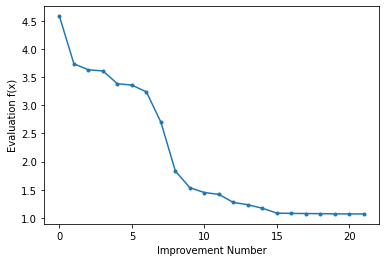

In [116]:
#seed th pseudorandom number generator
n_iterations=1000
step_size=0.1
temp=10
#peform the simulated annealing search
best, score,scores = simulated_annealing(objective, bounds, n_iterations, step_size, temp)
print('Done!')
print('f(%s)=%f'%(best,score))
#line plot of best scores
plt.plot(scores,'.-')
plt.xlabel('Improvement Number')
plt.ylabel('Evaluation f(x)')
plt.show()

## test tricky cases
use initial step at 4 
test how important the choice of temperature is



In [117]:
#simulated annealing algorithm
def simulated_annealing(objective, bounds,n_iteractions, step_size, temp):
    #generate an intinal pont as a randon point wihthin the bounds of the problem
    #best=bounds[:,0]+ np.random.rand(len(bounds))*(bounds[:,1]-bounds[:,0])
    best=[4]
    #evaluate teh initial point
    best_eval=objective(best)
    # current working solution
    curr, curr_eval =best, best_eval
    scores= list()
    #loop over interations of algorithem
    #run the algorithm
    for i in range(n_iterations):
        #take a step
        candidate=curr +np.random.randn(len(bounds))*step_size
        #evaluate candiate point
        candidate_eval=objective(candidate)
        if candidate_eval < best_eval:
            #store new best point
            best, best_eval = candidate, candidate_eval
            scores.append(best_eval)
            # report progress
            print('>%d f(%s)=%.5f'%(i, best, best_eval))
        #difference between candidate and current point evaluation
        diff=candidate_eval - curr_eval

        # calculate tempreature for current epoch
        t =temp/float(i+1)

        #calculate metroplolis acceptance criteria
        metropolis =np.exp(-diff/t)

        # keept the new point in this two senarioes
        if diff < 0 or np.random.rand() < metropolis:
            #store the new current point
            curr, curr_eval = candidate, candidate_eval 
    return[best, best_eval,scores]

>0 f([3.92075062])=9.67924
>57 f([3.93771602])=9.67081
>63 f([3.26591519])=9.16489
>68 f([3.2151337])=8.91058
>73 f([3.20230008])=8.84324
>76 f([3.20060611])=8.83429
>77 f([3.12368245])=8.43187
>78 f([2.96522447])=7.93951
>84 f([2.94644518])=7.93065
>94 f([2.33910711])=7.58451
>98 f([2.33545499])=7.56954
>99 f([2.25760832])=7.20836
>100 f([2.23883405])=7.11044
>101 f([2.11348389])=6.42585
>102 f([2.09263469])=6.32327
>104 f([2.07782764])=6.25562
>115 f([1.94018211])=5.92530
>135 f([1.934501])=5.92394
>174 f([1.92654483])=5.92343
>210 f([1.92813077])=5.92341
>259 f([1.42725535])=5.73537
>261 f([1.41511127])=5.69559
>263 f([1.34090544])=5.40988
>268 f([1.16095885])=4.44266
>269 f([1.1291725])=4.25930
>272 f([0.91042933])=3.60812
>320 f([0.9140371])=3.60800
>885 f([0.91393353])=3.60800
Done!
f([0.91393353])=3.607999


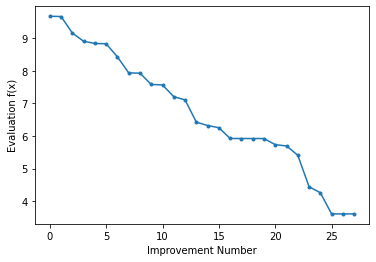

In [118]:

n_iterations=1000
step_size=0.1
temp=10
#peform the simulated annealing search
best, score,scores = simulated_annealing(objective, bounds, n_iterations, step_size, temp)
print('Done!')
print('f(%s)=%f'%(best,score))
#line plot of best scores
plt.plot(scores,'.-')
plt.xlabel('Improvement Number')
plt.ylabel('Evaluation f(x)')
plt.show()

At low temperature, it gets stuck.

>2 f([3.93123299])=9.67318
>214 f([3.95749544])=9.67062
>229 f([3.94715748])=9.66935
>309 f([3.35642422])=9.54301
>311 f([3.31277505])=9.37424
>312 f([3.20421229])=8.85332
>313 f([3.03558938])=8.07063
>317 f([2.95223924])=7.93229
>319 f([2.93957195])=7.92991
>388 f([2.35859398])=7.66127
>389 f([2.14813763])=6.61002
>391 f([2.09720153])=6.34506
>392 f([1.94852346])=5.92886
>394 f([1.93037735])=5.92348
>424 f([1.41554909])=5.69706
>425 f([1.33253365])=5.37292
>427 f([1.23168543])=4.85639
>428 f([1.13735868])=4.30572
>429 f([1.07514725])=3.97841
>431 f([0.9652418])=3.64100
>432 f([0.85212777])=3.64002
>436 f([0.91280569])=3.60801
>439 f([0.52385774])=3.53648
>440 f([0.33065351])=2.84745
>445 f([0.31317288])=2.76050
>447 f([0.30199603])=2.70272
>448 f([0.20308797])=2.12820
>449 f([0.18509677])=2.01570
>450 f([0.16880361])=1.91352
>452 f([0.14145487])=1.74390
>455 f([0.10818173])=1.54662
>456 f([0.039438])=1.20579
>458 f([0.00887146])=1.09592
>474 f([-0.00723786])=1.09087
>483 f([-0.0031773

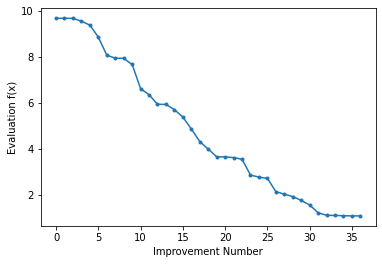

In [119]:
n_iterations=1000
step_size=0.1
temp=50
#peform the simulated annealing search
best, score,scores = simulated_annealing(objective, bounds, n_iterations, step_size, temp)
print('Done!')
print('f(%s)=%f'%(best,score))
#line plot of best scores
plt.plot(scores,'.-')
plt.xlabel('Improvement Number')
plt.ylabel('Evaluation f(x)')
plt.show()

At much higher temperature, it gets over the local minimum.